# DECISION TREE

Tasks:
*1. Data Preparation:*
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [138]:
import pandas as pd

df = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


**2. Exploratory Data Analysis (EDA):**
Perform exploratory data analysis to understand the structure of the dataset.


In [139]:
df.shape

(908, 13)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


Check for missing values, outliers, and inconsistencies in the data.

In [141]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [142]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [143]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


In [144]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
cat_features = df.select_dtypes(include=['object']).columns.to_list()

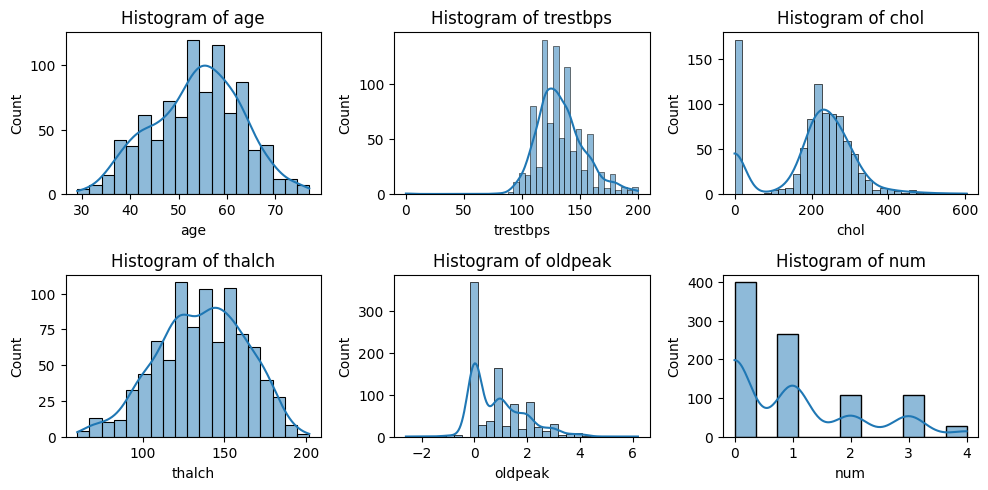

In [147]:
# Histogram 
plt.figure(figsize=(10,7))
for i,col in enumerate(num_features):
    plt.subplot(3,3,i+1)
    plt.title(f'Histogram of {col}')
    sns.histplot(df[col],kde=True,fill=True)
    plt.xlabel(f'{col}')
plt.tight_layout()
plt.show()


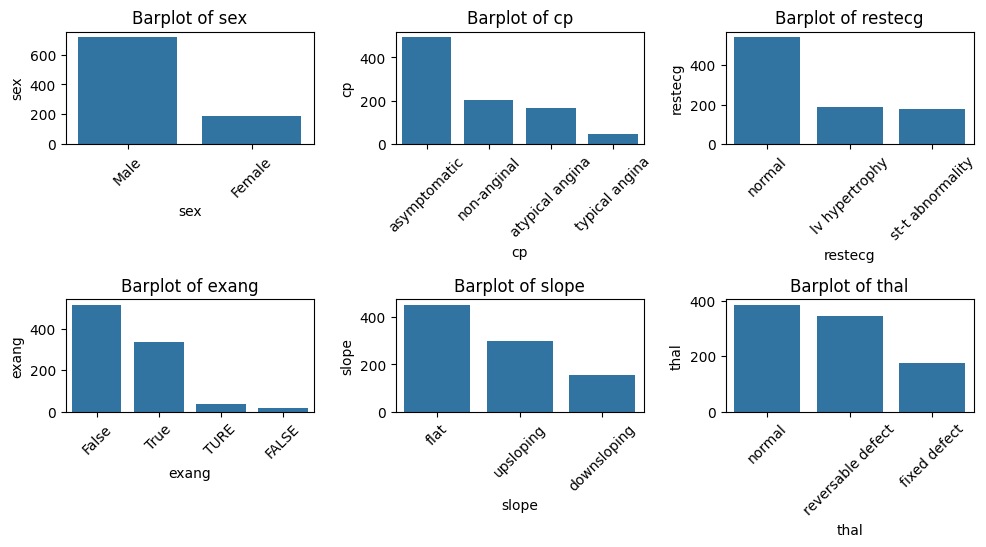

In [148]:
# Box plot

plt.figure(figsize=(10,7))
for i,col in enumerate(cat_features):
    plt.subplot(3,3,i+1)
    plt.title(f'Barplot of {col}')
    sns.barplot(df[col].value_counts())
    plt.xticks(rotation=45)
    plt.xlabel(f'{col}')
plt.tight_layout()
plt.show()

In [149]:
df.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.232718,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.152162,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.028744,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.022756,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.128728,-0.323058
oldpeak,0.232718,0.152162,0.028744,0.022756,-0.128728,1.000000,0.416580
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.416580,1.000000


**3. Feature Engineering:**
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [150]:
df['exang'].value_counts()

False    516
True     337
TURE      36
FALSE     19
Name: exang, dtype: int64

In [151]:
df['exang'] = df['exang'].astype(str).str.strip().str.lower()
df['exang'] = df['exang'].replace({'true': 'True', 'false': 'False', 'ture': 'True'})

In [152]:
df['exang'].value_counts()

False    535
True     373
Name: exang, dtype: int64

In [153]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_features:
    df[col] = le.fit_transform(df[col])

df['fbs'] = le.fit_transform(df['fbs'])
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,1,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,1,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,1,0.891253,0,0,4


In [154]:
# Scaling

from sklearn.preprocessing  import StandardScaler

st = StandardScaler()
df_scaled = pd.DataFrame(st.fit_transform(df),columns=df.columns)
df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,0.514416,2.320276,0.567394,0.281297,1.976894,-1.561352,0.524183,-0.834983,1.334996e+00,-1.672770,-1.615852,-0.881977
1,-1.397560,0.514416,0.232258,0.076967,0.013526,-0.505844,0.013879,-0.147705,-0.834983,-8.445938e-01,-0.224843,-1.615852,-0.881977
2,0.350503,0.514416,-0.811752,0.322181,-0.084656,-0.505844,0.013879,0.449529,-0.834983,-4.655347e-01,-0.224843,-1.615852,-0.881977
3,-0.195767,0.514416,2.320276,-0.756760,-0.138211,-0.505844,-1.561352,2.017268,-0.834983,-8.445938e-01,-0.224843,-1.615852,-0.881977
4,0.350503,0.514416,-0.811752,-1.149102,-0.004325,-0.505844,0.013879,-0.371668,1.197629,5.768777e-01,-0.224843,-1.615852,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,0.514416,-0.811752,-0.413461,-1.798388,-0.505844,0.013879,-0.595631,-0.834983,5.768777e-01,1.223083,1.106214,2.615119
904,0.896773,0.514416,-0.811752,1.597292,-0.281021,-0.505844,1.589110,-0.595631,1.197629,1.998349e+00,-0.224843,1.106214,2.615119
905,0.241249,0.514416,1.276267,1.793463,-1.798388,-0.505844,-1.561352,-0.483649,1.197629,1.524525e+00,-1.672770,-0.254819,2.615119
906,0.241249,0.514416,1.276267,0.518352,0.058155,1.976894,1.589110,-1.155538,1.197629,-1.052100e-16,-1.672770,-1.615852,2.615119


### 4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [155]:
from sklearn.model_selection import train_test_split

X = df.drop('num',axis=1)
Y = df['num']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)


Implement a Decision Tree Classification model using a library like scikit-learn.

In [156]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',max_depth=5)

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [157]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 3, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 0, 1, 4, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 3, 0,
       0, 0, 0, 0, 2, 1, 3, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 3, 4,
       2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [158]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("Precision_score: ",precision_score(y_test,y_pred,average='weighted',zero_division=0))
print("Recall_score: ",recall_score(y_test,y_pred,average='weighted',zero_division=0))
print("F1_score: ",f1_score(y_test,y_pred,average='weighted',zero_division=0))

Accuracy:  48.9010989010989
Precision_score:  0.4594016263404018
Recall_score:  0.489010989010989
F1_score:  0.4487825857634015


In [159]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=dt.classes_)

y_prob = dt.predict_proba(x_test)

roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.6859904945716513


5. Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [160]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[4,5,6,7,8,9,10],
    'criterion':['entropy','gini'],
    'min_samples_split': [2, 5, 10, 20]
}
model = DecisionTreeClassifier()

gsv = GridSearchCV(model,param_grid=params,cv=5)
gsv.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': [4, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [161]:
gsv.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 10}

In [162]:
gsv.best_score_*100

55.239489844119035

### 6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained

In [163]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=2)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [164]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("Precision_score: ",precision_score(y_test,y_pred,average='weighted',zero_division=0))
print("Recall_score: ",recall_score(y_test,y_pred,average='weighted',zero_division=0))
print("F1_score: ",f1_score(y_test,y_pred,average='weighted',zero_division=0))

Accuracy:  50.54945054945055
Precision_score:  0.3836102672837366
Recall_score:  0.5054945054945055
F1_score:  0.42246612172720543


In [165]:
y_prob = dtc.predict_proba(x_test)
print("Roc_curve: ",roc_auc_score(y_test_bin,y_prob,multi_class='ovr')*100)

Roc_curve:  67.27702719545638


Visualize the decision tree structure to understand the rules learned by the model and identify important features

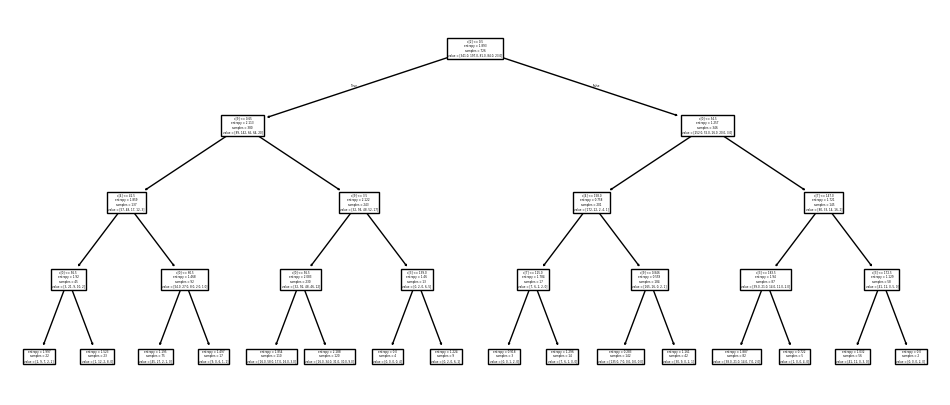

In [166]:
from sklearn import tree
plt.figure(figsize=(12,5))
tree.plot_tree(dtc)
plt.show()

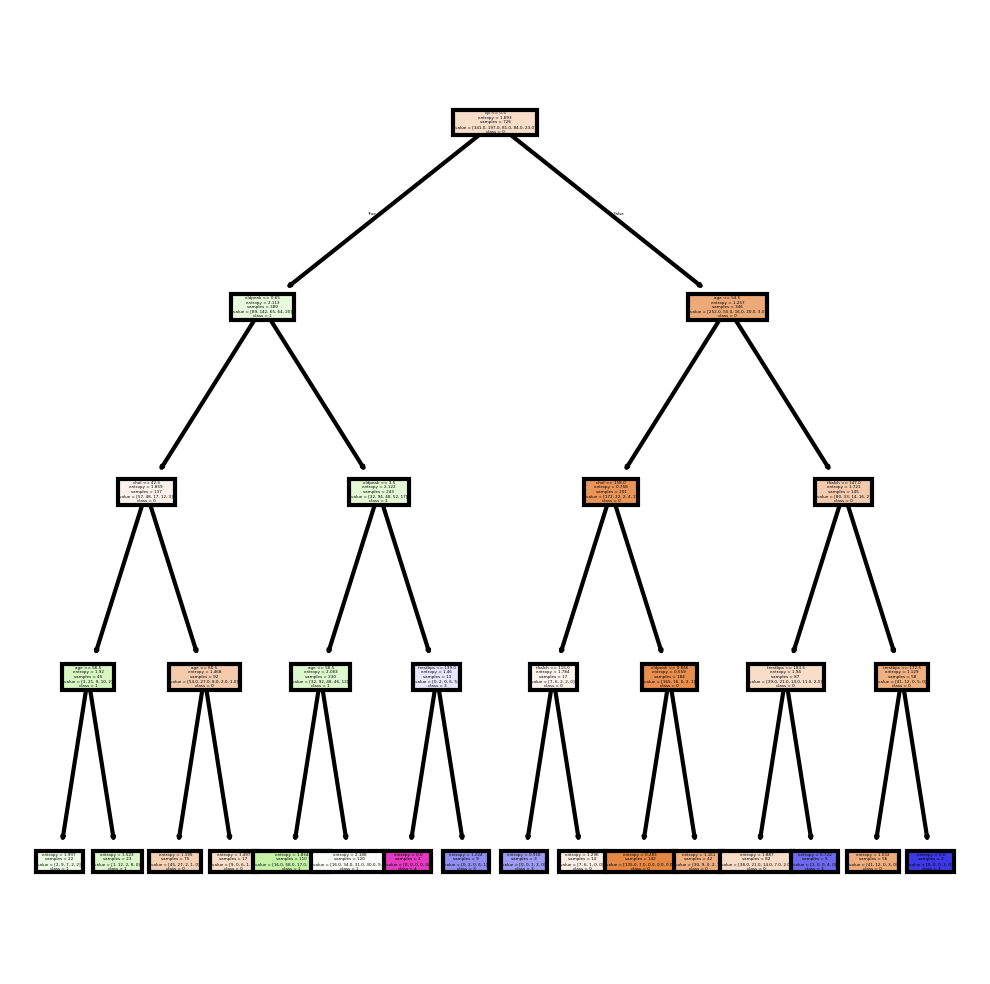

In [167]:
fn=list(df.drop('num',axis=1).columns)
cn=['0','1','2','3','4','5']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True); 


### Interview Questions:

#### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common hyperparameters of decision tree models:

**max_depth** – Limits the depth of the tree; smaller values prevent overfitting, larger values may capture more patterns but risk overfitting.

**min_samples_split** – Minimum samples required to split a node; higher values make the tree more general, lower values make it more complex.

**criterion** – Measures the quality of a split (gini or entropy); affects how the tree decides the best splits.

**min_samples_leaf** – Minimum samples required at a leaf node; higher values smooth the model, lower values may overfit.

#### 2. What is the difference between the Label encoding and One-hot encoding?

**Label Encoding:**

- Converts categories into integers (e.g., Red → 0, Blue → 1).
- Imposes an ordinal relationship, which may mislead some algorithms.

**One-Hot Encoding:**

- Creates binary columns for each category (e.g., Red → [1,0], Blue → [0,1]).
- Avoids ordinal relationships but increases dimensionality.